## Part 3 - Prediction (Using scikit-learn Estimator)

In this section, we reimplement simple linear regression using scikit-learn's `LinearRegression` estimator. 

We split the dataset into training and testing sets, train the model, evaluate it, make predictions, and visualize the regression line.

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
df = pd.read_csv("../data/ave_hi_nyc_jan_1895-2018.csv")
df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [22]:
df.columns = ['Date', 'Temperature', 'Anomaly']
df.head()

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [23]:
df['Date'] = df['Date'].floordiv(100)
df.head()

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


### Section 1 - Build the Model

In [24]:
X = df['Date'].values.reshape(-1, 1)
y = df['Temperature'].values

X[:5], y[:5]

(array([[1895],
        [1896],
        [1897],
        [1898],
        [1899]]),
 array([34.2, 34.7, 35.5, 39.6, 36.4]))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=11
)

X_train.shape, X_test.shape

((93, 1), (31, 1))

In [26]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [27]:
linear_regression.coef_

array([0.01939167])

In [28]:
linear_regression.intercept_

np.float64(-0.30779820252656265)

### Section 2 - Test the Model

In [29]:
predicted = linear_regression.predict(X_test)
expected = y_test

In [30]:
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict

In [31]:
predict = lambda x: linear_regression.coef_ * x + linear_regression.intercept_

predict(2024)

array([38.94094855])

### Section 4 - Visualization

(10.0, 70.0)

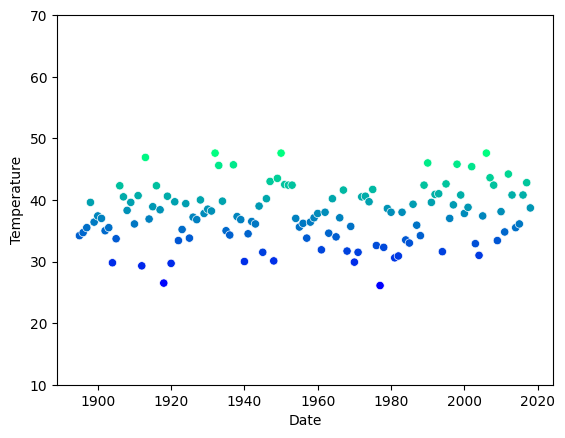

In [32]:
axes = sns.scatterplot(
    data=df,
    x='Date',
    y='Temperature',
    hue='Temperature',
    palette='winter',
    legend=False
)

axes.set_ylim(10, 70)

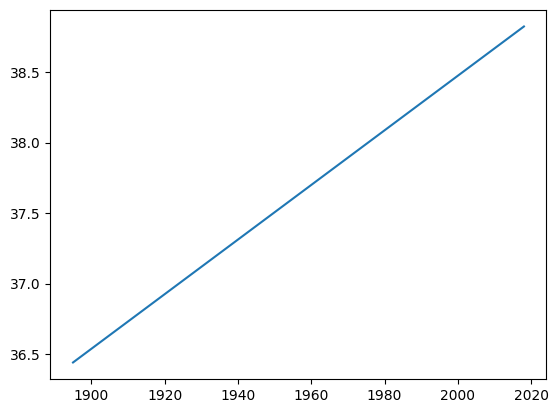

In [33]:
x_values = pd.DataFrame([df['Date'].min(), df['Date'].max()])
y_values = linear_regression.predict(x_values)

plt.plot(x_values, y_values)
plt.show()